In [4]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 5.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 6.1 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 6.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.7 MB 7.6 MB/s eta 

In [5]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from transformers import BertTokenizer, TFBertForSequenceClassification
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("D:/Bookify.com/New folder/Database/database/cleaned_datasets/processed_reviews.csv")  # Ensure it has 'review' and 'sentiment' columns
df

C:\Users\ramya\AppData\Local\Temp\ipykernel_5052\3547202450.py:1: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/Bookify.com/New folder/Database/database/cleaned_datasets/processed_reviews.csv")  # Ensure it has 'review' and 'sentiment' columns


,review_id,platform,asin,book_name,author,reviewer_name,review_title,review_text,rating,review_date,...,verified,helpful,combined_review,cleaned,no_stopwords,lemmatized,tokens,joined,w2v_vector,sentiment
0,48235e132322f1f1d38273eb33bde48f,Amazon,B0033UV8HI,Not Available,Not Available,Ridley,Entertaining But Average,"Jace Rankin may be short, but he's nothing to ...",3,2010-09-02,...,False,"[8, 10]",Entertaining But Average Jace Rankin may be sh...,entertaining but average jace rankin may be sh...,entertaining average jace rankin may short hes...,entertaining average jace rankin may short he ...,"['entertaining', 'average', 'jace', 'rankin', ...",entertaining average jace rankin may short he ...,[-0.36792505 -0.9909726 0.27137458 0.034692...,neutral
1,ef97bbe96ff2ffe7dfb0852e39a0e1ea,Amazon,B002HJV4DE,Not Available,Not Available,Holly Butler,Terrific menage scenes!,Great short read. I didn't want to put it dow...,5,2013-10-08,...,False,"[1, 1]",Terrific menage scenes! Great short read. I d...,terrific menage scenes great short read i didn...,terrific menage scenes great short read didnt ...,terrific menage scene great short read didnt w...,"['terrific', 'menage', 'scene', 'great', 'shor...",terrific menage scene great short read didnt w...,[-0.5433881 -1.7709152 0.67714506 -0.005419...,positive
2,ffa408e5333fda43220110b396f469d9,Amazon,B002ZG96I4,Not Available,Not Available,Merissa,Snapdragon Alley,I'll start by saying this is the first of four...,3,2014-04-11,...,False,"[0, 0]",Snapdragon Alley I'll start by saying this is ...,snapdragon alley ill start by saying this is t...,snapdragon alley ill start saying first four b...,snapdragon alley ill start saying first four b...,"['snapdragon', 'alley', 'ill', 'start', 'sayin...",snapdragon alley ill start saying first four b...,[-0.26081926 -1.2878057 0.27687296 0.119117...,neutral
3,d5b5ad9a44016bc335af15c715efa85d,Amazon,B002QHWOEU,Not Available,Not Available,Cleargrace,very light murder cozy,Aggie is Angela Lansbury who carries pocketboo...,3,2014-07-05,...,False,"[1, 3]",very light murder cozy Aggie is Angela Lansbur...,very light murder cozy aggie is angela lansbur...,light murder cozy aggie angela lansbury carrie...,light murder cozy aggie angela lansbury carry ...,"['light', 'murder', 'cozy', 'aggie', 'angela',...",light murder cozy aggie angela lansbury carry ...,[-0.474576 -1.2394472 0.23362859 -0.098878...,neutral
4,6f54882f555c3a31bf0bc5a2d007e1e8,Amazon,B001A06VJ8,Not Available,Not Available,Rjostler,Book,I did not expect this type of book to be in li...,4,2012-12-31,...,False,"[0, 1]",Book I did not expect this type of book to be ...,book i did not expect this type of book to be ...,book expect type book library pleased find pri...,book expect type book library pleased find pri...,"['book', 'expect', 'type', 'book', 'library', ...",book expect type book library pleased find pri...,[ 0.35064948 -1.2930781 0.01877313 0.345010...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79462,0bbafa54ee3f1f8485989d717f8e0285,CustomerReviews,1492646318,How to Catch an Elf,Adam Wallace,Carol Mccoy,A cute Christmas book for STEM,Definitely a cute read aloud book to get kids ...,5,2023-09-04,...,1.0,0,A cute Christmas book for STEM Definitely a cu...,a cute christmas book for stem definitely a cu...,cute christmas book stem definitely cute read ...,cute christmas book stem definitely cute read ...,"['cute', 'christmas', 'book', 'stem', 'definit...",cute christmas book stem definitely cute read ...,[-0.16936101 -0.6945811 0.3211885 -0.084966...,positive
79463,7898c8d5febb0343f769a569dbd086a8,CustomerReviews,1501161938,The Seven Husbands of Evelyn Hugo: A Novel,Morgan Housel,Chelscey,Hollywood hasn't changed much,Starting at the young age of fourteen and endi...,5,2022-04-25,...,1.0,0,Hollywood hasn't changed much Starting at the ...,hollywood hasnt changed much starting at the y...,hollywood hasnt changed much starting young ag...,hollyw

In [7]:
df.dropna(subset=['joined', 'sentiment'], inplace=True)
texts = df['joined'].astype(str)
labels = df['sentiment'].astype(str)


In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(texts, y, test_size=0.2, random_state=42)

In [11]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=100, padding='post')

In [12]:
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


D:\Database\Notebooks\tf_env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), epochs=5, batch_size=32)

Epoch 1/5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.7000 - loss: 0.8263 - val_accuracy: 0.7016 - val_loss: 0.8037
Epoch 2/5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7060 - loss: 0.7842 - val_accuracy: 0.7028 - val_loss: 0.7875
Epoch 3/5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.7204 - loss: 0.7358 - val_accuracy: 0.6952 - val_loss: 0.7573
Epoch 4/5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.7659 - loss: 0.6216 - val_accuracy: 0.7301 - val_loss: 0.7475
Epoch 5/5
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.7995 - loss: 0.5415 - val_accuracy: 0.7236 - val_loss: 0.7925


In [15]:
print("\nLSTM Evaluation:")
lstm_preds = np.argmax(lstm_model.predict(X_val_pad), axis=1)
print(classification_report(y_val, lstm_preds, target_names=label_encoder.classes_))


LSTM Evaluation:
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

    negative       0.56      0.36      0.44      2928
     neutral       0.30      0.09      0.13      1815
    positive       0.76      0.92      0.84     11151

    accuracy                           0.72     15894
   macro avg       0.54      0.46      0.47     15894
weighted avg       0.67      0.72      0.68     15894



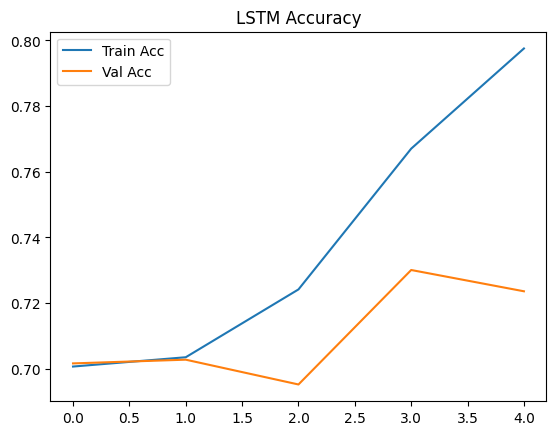

In [16]:
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("LSTM Accuracy")
plt.legend()
plt.show()
